<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Ancho y Frecuencia Constantes </font> </center>

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

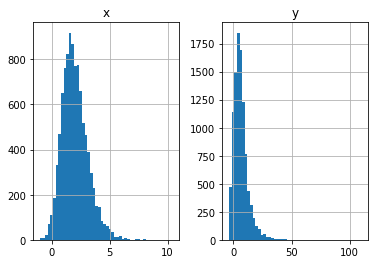

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

N=10**4
normal=np.random.normal(size=(N,1))
gamma=np.random.gamma(shape=4,size=(N,1))
x=0.5*normal+0.5*gamma
y=x**2+1+np.random.uniform(-5,5,(N,1))
df=pd.DataFrame(np.concatenate((x,y),axis=1),columns=('x','y'))
df.hist(bins=50)

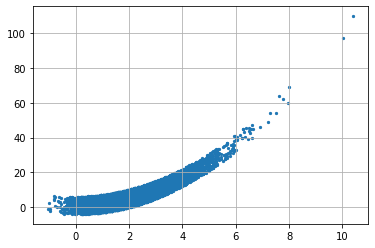

In [2]:
plt.scatter(df['x'],df['y'],s=5)
plt.grid()

In [3]:
#@title Discretización por ancho constante
bins=50
ancho=(df.x.max()-df.x.min())/bins
#intervalos=np.arange(df.x.min(),df.x.max()+ancho,ancho)
intervalos=np.linspace(df.x.min(),df.x.max(),bins+1)
ancho,intervalos

(0.22829465271962487,
 array([-1.0319899 , -0.80369524, -0.57540059, -0.34710594, -0.11881129,
         0.10948337,  0.33777802,  0.56607267,  0.79436732,  1.02266198,
         1.25095663,  1.47925128,  1.70754594,  1.93584059,  2.16413524,
         2.39242989,  2.62072455,  2.8490192 ,  3.07731385,  3.3056085 ,
         3.53390316,  3.76219781,  3.99049246,  4.21878712,  4.44708177,
         4.67537642,  4.90367107,  5.13196573,  5.36026038,  5.58855503,
         5.81684968,  6.04514434,  6.27343899,  6.50173364,  6.7300283 ,
         6.95832295,  7.1866176 ,  7.41491225,  7.64320691,  7.87150156,
         8.09979621,  8.32809086,  8.55638552,  8.78468017,  9.01297482,
         9.24126948,  9.46956413,  9.69785878,  9.92615343, 10.15444809,
        10.38274274]))

In [4]:
pd.cut?

In [5]:
# Discretización
#
# Se obtienen valores distribuidos a lo largo del rango de 'x' de forma que le asignamos la misma importancia
df['ancho_x']=pd.cut(df.x,intervalos,include_lowest=True)
df.head()

,x,y,ancho_x
0,2.278226,9.864900,"(2.164, 2.392]"
1,2.713892,9.109180,"(2.621, 2.849]"
2,3.852089,13.853222,"(3.762, 3.99]"
3,4.641221,21.811524,"(4.447, 4.675]"
4,0.903068,5.730663,"(0.794, 1.023]"


In [6]:
df['ancho_x'].value_counts()

(1.479, 1.708]      918
(1.708, 1.936]      867
(1.251, 1.479]      824
(2.164, 2.392]      774
(1.936, 2.164]      771
(1.023, 1.251]      761
(2.392, 2.621]      659
(0.794, 1.023]      650
(2.621, 2.849]      517
(0.566, 0.794]      470
(2.849, 3.077]      465
(3.077, 3.306]      389
(0.338, 0.566]      331
(3.306, 3.534]      298
(3.534, 3.762]      231
(0.109, 0.338]      184
(3.762, 3.99]       152
(3.99, 4.219]       144
(-0.119, 0.109]     112
(4.219, 4.447]       85
(4.447, 4.675]       72
(-0.347, -0.119]     71
(4.675, 4.904]       59
(4.904, 5.132]       49
(5.132, 5.36]        36
(-0.575, -0.347]     22
(5.817, 6.045]       18
(5.36, 5.589]        14
(5.589, 5.817]       13
(-0.804, -0.575]     10
(6.273, 6.502]        8
(-1.033, -0.804]      6
(6.045, 6.273]        5
(6.502, 6.73]         5
(7.872, 8.1]          2
(7.187, 7.415]        2
(7.415, 7.643]        2
(9.926, 10.154]       1
(10.154, 10.383]      1
(7.643, 7.872]        1
(6.73, 6.958]         1
(8.1, 8.328]    

<AxesSubplot:>

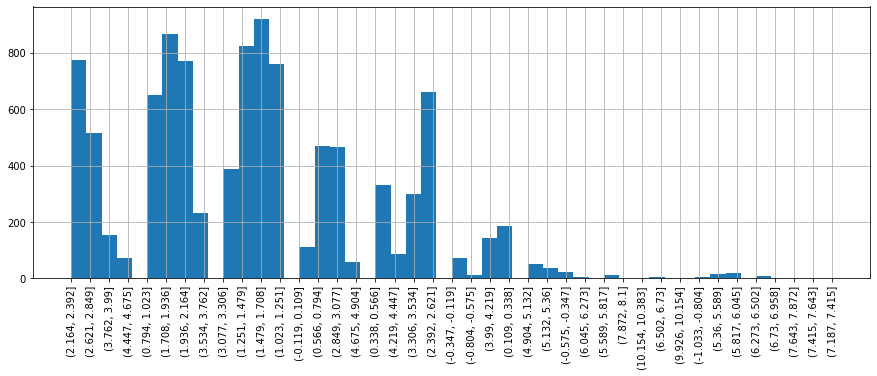

In [7]:
df['ancho_x'].astype('str').hist(figsize=(15,5),bins=50,xrot=90)

In [8]:
x=df.groupby('ancho_x')['x'].mean()
y=df.groupby('ancho_x')['y'].mean()
x.isna().sum(),y.isna().sum()

(9, 9)

In [9]:
#x=x.dropna()
#y=y.dropna()
while(x.isna().sum()>0): # Parche
    nans_x=np.where(x.isna())
    for idx in nans_x:
        x.iloc[idx]=x.iloc[idx-1]
        y.iloc[idx]=y.iloc[idx-1]
x.isna().sum()

0

In [10]:
y.isna().sum()

0

In [11]:
#@title Regresión
lin_ancho_x=LinearRegression()
lin_ancho_x.fit(x.values.reshape(-1,1),y)
predict_ancho_x=lin_ancho_x.predict(df[['x']])

In [12]:
lin_SD=LinearRegression()
lin_SD.fit(df[['x']],df['y'])
predict_SD=lin_SD.predict(df[['x']])

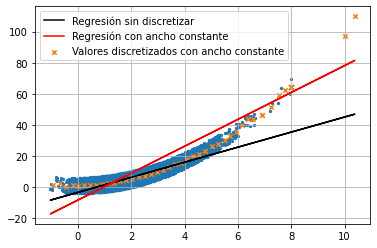

In [13]:
# Gráfico
plt.scatter(df.x,df.y,s=5)
plt.plot(df.x,predict_SD,'k',label='Regresión sin discretizar')
plt.plot(df.x,predict_ancho_x,'r',label='Regresión con ancho constante')
plt.scatter(x,y,marker='x',s=20,label='Valores discretizados con ancho constante')
plt.legend()
plt.grid()

In [14]:
#@title Discretización con frecuencia constante
# Usamos la misma cantidad de contenedores
bins

50

In [15]:
df.x.shape[0] # Cantidad de observaciones

10000

In [16]:
# Cada contenedor tendrá 200 observaciones
df.x.shape[0]/bins

200.0

In [18]:
pd.qcut?

In [17]:
ancho

0.22829465271962487

In [20]:
# Discretización
df['freq_x'], intervalos = pd.qcut(df.x,bins, retbins=True)

In [21]:
df

,x,y,ancho_x,freq_x
0,2.278226,9.864900,"(2.164, 2.392]","(2.222, 2.282]"
1,2.713892,9.109180,"(2.621, 2.849]","(2.693, 2.778]"
2,3.852089,13.853222,"(3.762, 3.99]","(3.84, 4.162]"
3,4.641221,21.811524,"(4.447, 4.675]","(4.162, 4.71]"
4,0.903068,5.730663,"(0.794, 1.023]","(0.866, 0.94]"
...,...,...,...,...
9995,3.055161,7.419214,"(2.849, 3.077]","(2.978, 3.07]"
9996,2.043814,3.329651,"(1.936, 2.164]","(2.042, 2.096]"
9997,2.100338,3.904611,"(1.936, 2.164]","(2.096, 2.166]"
9998,1.549671,1.669935,"(1.479, 1.708]","(1.522, 1.572]"


In [22]:
df['freq_x'].value_counts()

(-1.033, 0.0853]    200
(2.61, 2.693]       200
(1.986, 2.042]      200
(2.042, 2.096]      200
(2.096, 2.166]      200
(2.166, 2.222]      200
(2.222, 2.282]      200
(2.282, 2.341]      200
(2.341, 2.402]      200
(2.402, 2.465]      200
(2.465, 2.532]      200
(2.532, 2.61]       200
(2.693, 2.778]      200
(0.0853, 0.334]     200
(2.778, 2.872]      200
(2.872, 2.978]      200
(2.978, 3.07]       200
(3.07, 3.183]       200
(3.183, 3.303]      200
(3.303, 3.45]       200
(3.45, 3.632]       200
(3.632, 3.84]       200
(3.84, 4.162]       200
(4.162, 4.71]       200
(1.93, 1.986]       200
(1.871, 1.93]       200
(1.822, 1.871]      200
(1.767, 1.822]      200
(0.334, 0.481]      200
(0.481, 0.601]      200
(0.601, 0.705]      200
(0.705, 0.793]      200
(0.793, 0.866]      200
(0.866, 0.94]       200
(0.94, 1.005]       200
(1.005, 1.068]      200
(1.068, 1.129]      200
(1.129, 1.185]      200
(1.185, 1.246]      200
(1.246, 1.301]      200
(1.301, 1.354]      200
(1.354, 1.414]  

In [23]:
xF = df.groupby('freq_x')['x'].mean()
yF = df.groupby('freq_x')['y'].mean()

In [25]:
xF.isna().sum(), yF.isna().sum()

(0, 0)

In [26]:
#@title Regresión
lin_freq_x=LinearRegression()
lin_freq_x.fit(xF.values.reshape(-1,1),yF)
predict_freq_x=lin_freq_x.predict(df[['x']].values)

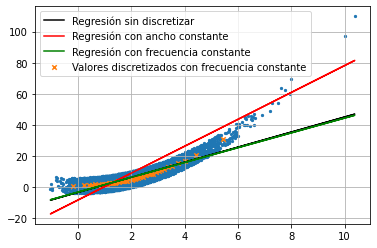

In [27]:
# Gráfico
plt.scatter(df.x,df.y,s=5)
plt.plot(df.x,predict_SD,'k',label='Regresión sin discretizar')
plt.plot(df.x,predict_ancho_x,'r',label='Regresión con ancho constante')
plt.plot(df.x,predict_freq_x,'g',label='Regresión con frecuencia constante')
plt.scatter(xF,yF,marker='x',s=20,label='Valores discretizados con frecuencia constante')
plt.legend()
plt.grid()

In [28]:
# Modelo con datos sin discretizar
lin_SD.coef_, lin_SD.intercept_

(array([4.84543339]), -3.420455157479873)

In [29]:
# Modelo con datos discretizados
lin_freq_x.coef_, lin_freq_x.intercept_

(array([4.76027365]), -3.2499074362448708)

# Modelos conseguidos
Modelo con datos sin discretizar
$$
y=4.84x - 3.42
$$
Modelo con datos discretizados con frecuencia constante
$$
y=4.76x - 3.24
$$

In [ ]:
pd.cut(df.edad,bins=[0,12,25,35], retbins=True, labels=['Niño', 'Joven','Adulto'])

In [30]:
titanic_df = pd.read_csv("titanic.csv")

In [31]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

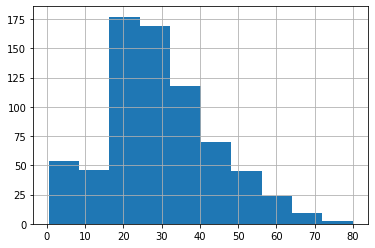

In [32]:
titanic_df['Age'].hist()

In [33]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [34]:
def cut_age(df, cut_values, label_names):
    df["Age_labels"] = pd.cut(df['Age'], bins=cut_values, labels=label_names)
    return df

In [35]:
cut_values = [0,3,12,19,35,60,80]
labels_names = ['infants', 'children', 'teenagers', 'young adults', 'middle adults', 'seniors']

In [37]:
cut_age(titanic_df, cut_values, labels_names)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young adults
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,teenagers
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young adults


In [39]:
import seaborn as sns

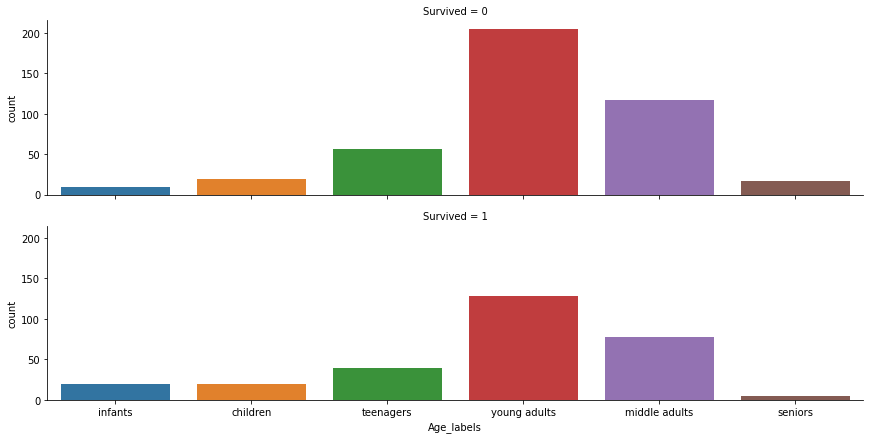

In [41]:
sns.catplot(x='Age_labels', row='Survived', kind="count", data=titanic_df, aspect=4, height=3)

In [43]:
def qcut_fare(df, cut_values, label_names):
    df["Fare_labels"] = pd.qcut(df['Fare'], cut_values, labels=label_names)
    return df
labels=['range1','range2','range3','range4']
titanic_df = qcut_fare(titanic_df, 4, labels)

In [44]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_labels,Fare_labels
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young adults,range1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle adults,range4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young adults,range2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young adults,range4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young adults,range2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young adults,range2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,teenagers,range3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,range3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young adults,range3


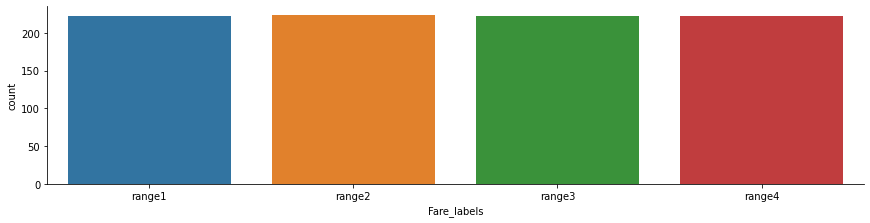

In [45]:
sns.catplot(x='Fare_labels',  kind="count", data=titanic_df, aspect=4, height=3)